In [1]:

# -*- coding: utf-8 -*-
import pandas as pd
#import scikit 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [2]:
myplayer = pd.read_csv('mydata3.csv')
#myplayer.groupby('Name').count()
Y = myplayer.IsLastYear
type(Y)

pandas.core.series.Series

# 산포도

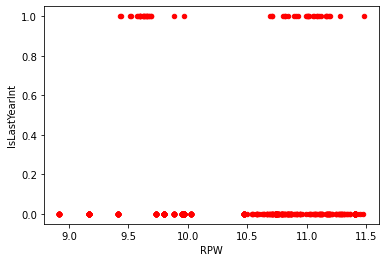

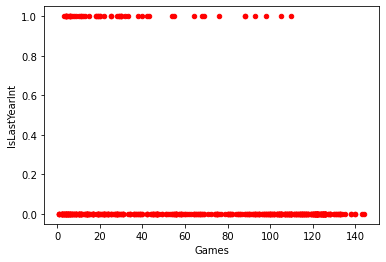

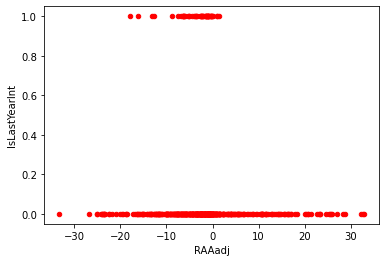

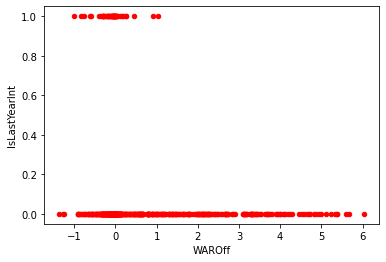

In [4]:
myplayer["IsLastYearInt"] = myplayer["IsLastYear"].astype(int)
myplayer.plot(kind='scatter',x='RPW',y='IsLastYearInt',color='red')
myplayer.plot(kind='scatter',x='Games',y='IsLastYearInt',color='red')
myplayer.plot(kind='scatter',x='RAAadj',y='IsLastYearInt',color='red')
myplayer.plot(kind='scatter',x='WAROff',y='IsLastYearInt',color='red')
#myplayer.show()

#import matplotlib.pyplot as plt 

#fig, axes = plt.subplots(4,3, sharey=True)
#myplayer.plot(x=myplayer[['RPW','Games']].values, y="IsLastYearInt", kind="scatter", subplots=True, sharey=True)


#for row in range(4) :
#    for col in range(3):
#        axes[row,col].plot(myplayer.iloc(row,col))
#fig.show()

In [5]:
#Input removing0
mode = "All" # "All", "HaydenChoice"
if mode == "All":
    x = myplayer.drop(['IsLastYear','Name','Team','InLastTeam','Transfer','Position','Year','WPA','Salary','루타수','wRCplus','CS','DoublePlay','IsLastYearInt','2BH','3BH','H','HR','SO'],axis = 1)
    #x = myplayer.drop(['IsLastYear','Name','Team','InLastTeam','Transfer','Position','Year','WPA','Salary','루타수','wRCplus','CS','DoublePlay','IsLastYearInt','2BH','3BH','H','HR','SO','BA','OBP','SLG','OPS'],axis = 1)
elif mode == "HaydenChoice":
    x = myplayer[['WAR','Age','PA','totRAA','WARStar']]
elif mode == "DTChoice":
    x = myplayer[['RPW','Games','WAROff','RAAadj','Games']]
x.columns

Index(['Age', 'Games', 'PA', 'AtBats', 'R', 'RBI', 'SB', 'BB', 'HBP', 'IW',
       'SacHit', 'SF', 'BA', 'OBP', 'SLG', 'OPS', 'wOBA', 'BattingRAA',
       'StealingRAA', 'BRRAA', 'offtotRAA', 'DefenseRAA', 'PosRAA',
       'deftotRAA', 'RAAadj', 'totRAA', 'repRun', 'RAR', 'RPW', 'WAA',
       'WARBat', 'WAROff', 'WARStar', 'dWAA', 'WAR'],
      dtype='object')

In [6]:
x2 = x.values.tolist()

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x2, Y, test_size=0.3, random_state=42)
#print(xtest)

# Decision Tree Classifier!

In [8]:
#clf = tree.DecisionTreeClassifier(max_depth = 6,criterion = 'entropy')
clf = tree.DecisionTreeClassifier(max_depth = 4,criterion = 'gini')
clf = clf.fit(xtrain,ytrain)
print("Score: ",clf.score(xtest,ytest))
print("Recall Score: ",recall_score(ytest,clf.predict(xtest)))
print("Precision Score: ",precision_score(ytest,clf.predict(xtest)))
print("F1 Score: ",f1_score(ytest,clf.predict(xtest)))
#clf.get_depth()
#clf.get_n_leaves()


Score:  0.9210526315789473
Recall Score:  0.42857142857142855
Precision Score:  0.6
F1 Score:  0.5


Index(['Age', 'Games', 'PA', 'AtBats', 'R', 'RBI', 'SB', 'BB', 'HBP', 'IW',
       'SacHit', 'SF', 'BA', 'OBP', 'SLG', 'OPS', 'wOBA', 'BattingRAA',
       'StealingRAA', 'BRRAA', 'offtotRAA', 'DefenseRAA', 'PosRAA',
       'deftotRAA', 'RAAadj', 'totRAA', 'repRun', 'RAR', 'RPW', 'WAA',
       'WARBat', 'WAROff', 'WARStar', 'dWAA', 'WAR'],
      dtype='object')


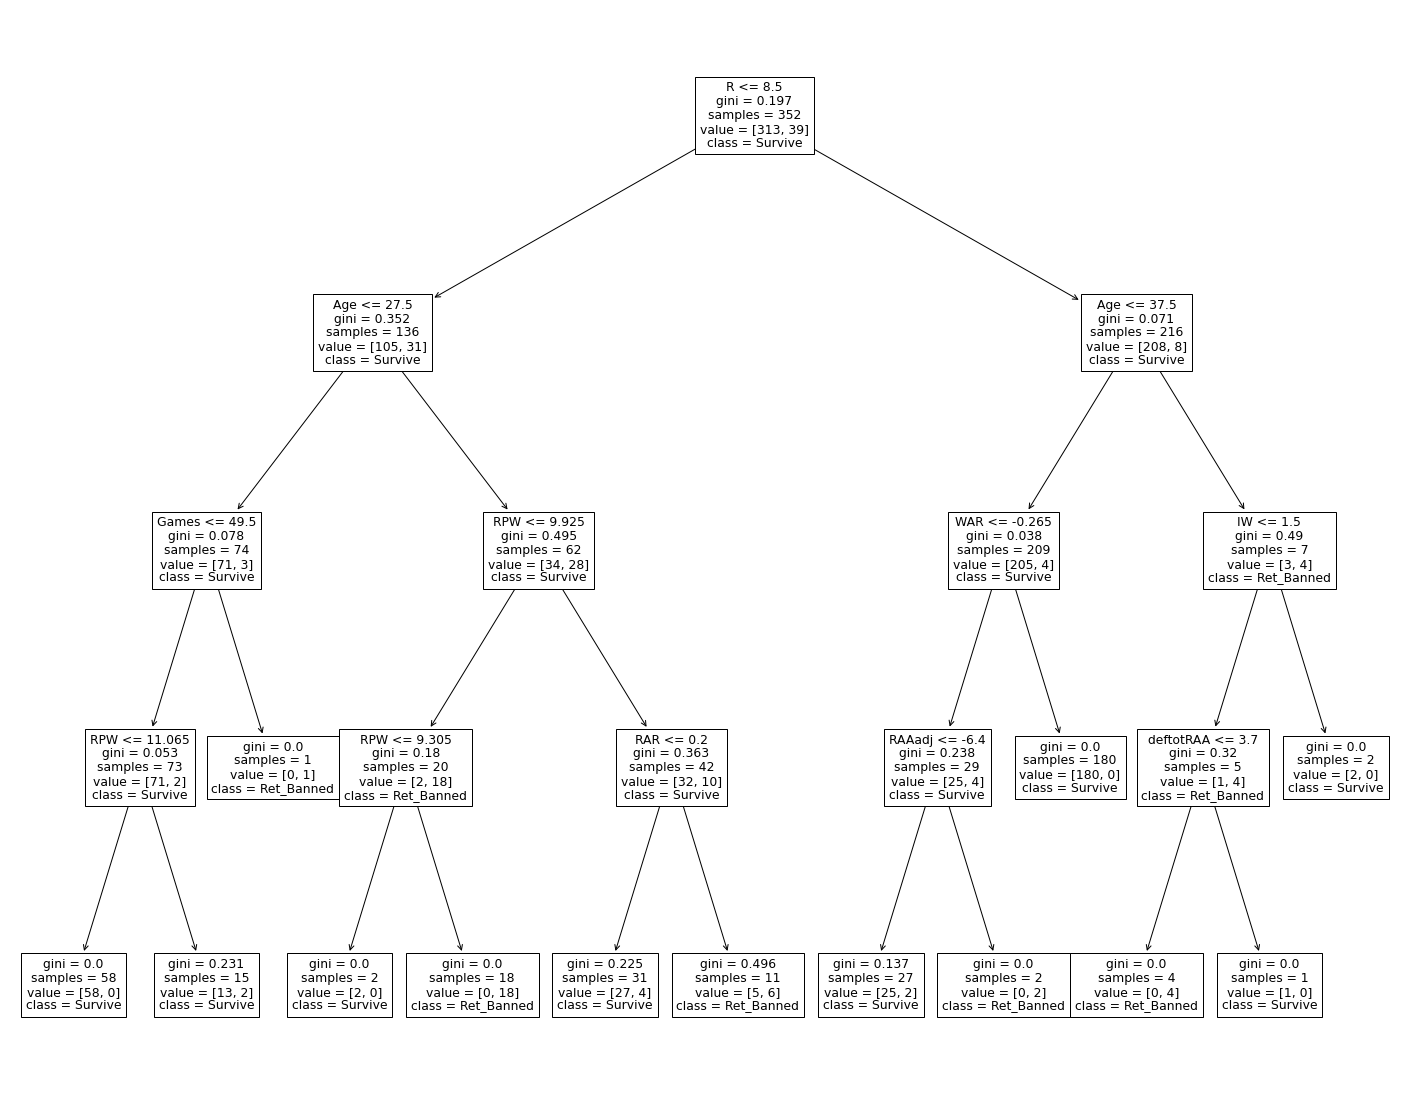

In [11]:
print(x.columns)
fig = plt.figure(figsize=(25,20)) 
_= tree.plot_tree(clf,feature_names = x.columns, class_names=["Survive","Ret_Banned"])
fig.savefig("DTree_all_col_gini_depth4(1819).png")

# KNN!

In [ ]:
#KNN using all columns
clf = KNeighborsClassifier(n_neighbors = 7)
clf = clf.fit(xtrain,ytrain)
clf.predict(xtest)
print("Score: ",clf.score(xtest,ytest))
print("Recall Score: ",recall_score(ytest,clf.predict(xtest)))
print("Precision Score: ",precision_score(ytest,clf.predict(xtest)))
print("F1 Score: ",f1_score(ytest,clf.predict(xtest)))